<a href="https://colab.research.google.com/github/flaviowu/btc-c14-g4/blob/main/analise_exploratoria_bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import random
import numpy as np
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modulo 6/train_clean_rev2.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/modulo 6/test_raw.csv')

In [3]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,date,stock,main_cat,sub_cat_1,sub_cat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,2018-6-18,27,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,2018-3-18,15,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2018-10-25,14,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,2018-2-20,1,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,2018-4-16,13,Women,Jewelry,Necklaces


In [4]:
train = train.drop(['brand_name', 'date', 'stock'], axis=1)
train.head()

,name,item_condition_id,price,shipping,item_description,main_cat,sub_cat_1,sub_cat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,10.0,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [5]:
print('Total de NaN nas colunas irem_condition_id e price\n')
train[['item_condition_id', 'price']].isna().mean()

Total de NaN nas colunas irem_condition_id e price



item_condition_id    0.0
price                0.0
dtype: float64

## CONDIÇÃO DOS ITENS

#### A condição dos itens que mais aparece é a **condição 1**, com 43% do total.

In [6]:
print('Números totais:' )
train.item_condition_id.value_counts()

Números totais:


1    638324
3    430402
2    373302
4     31803
5      2373
Name: item_condition_id, dtype: int64

In [7]:
print('Porcentagem:' )
train.item_condition_id.value_counts(normalize = True).mul(100).round(1).astype(str) + '%' # Frequencias relativas

Porcentagem:


1    43.2%
3    29.2%
2    25.3%
4     2.2%
5     0.2%
Name: item_condition_id, dtype: object

## PREÇO POR CONDIÇÃO

#### As **condições 1** e **3** se destacam com os **maiores valores totais**. Tendo **mais de 70%** do todo.

In [8]:
preco_total_por_condicao = []

for condicao in range(1,6):
    preco_total_por_condicao.append(train[train['item_condition_id'] 
                                          == condicao].price.sum())

serie_preco = pd.Series(index = range(1,6), 
                                data = preco_total_por_condicao)
print('Números totais:' )
serie_preco

Números totais:


1    16911379.0
2    10294711.0
3    11422223.0
4      774887.5
5       75354.0
dtype: float64

In [9]:
porc_preco_por_condicao = (serie_preco 
                          / serie_preco.sum()).mul(100).round(1).astype(str) + '%'
print('Porcentagem:' )
porc_preco_por_condicao

Porcentagem:


1    42.8%
2    26.1%
3    28.9%
4     2.0%
5     0.2%
dtype: object

#### **Preço medio** por condição dos itens. Os itens com **condição 5** se destacam com a **maior media** de preços.

In [10]:
preco_medio_por_condicao = []

for condicao in range(1,6):
    preco_medio_por_condicao.append(train[train['item_condition_id'] 
                                          == condicao].price.mean().round(2))

pd.Series(index = range(1,6), data = preco_medio_por_condicao)

1    26.49
2    27.58
3    26.54
4    24.37
5    31.75
dtype: float64

## INVESTIGAR AS CATEGORIAS DOS ITENS COM CONDIÇÃO 1

#### Principais categorias da condição 1 por coluna

main_cat | sub_cat_1 | sub_cat_2
---|--- | ---
Woman | Makeup | Face


---





In [11]:
condicao_1 = train[train['item_condition_id'] == 1]

condicao_1[['main_cat',	'sub_cat_1',	'sub_cat_2']].describe()

,main_cat,sub_cat_1,sub_cat_2
count,638324,638324,638324
unique,10,113,829
top,Women,Makeup,Face
freq,228077,89130,33787


#### **Women** e **Beauty** são as principais categorias da *coluna 'main_cat'* em condicao_1, chegando a mais de **58% do total** dos itens.

In [12]:
print('Frequencia relativa das categorias com condição 1\n')
condicao_1['main_cat'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

Frequencia relativa das categorias com condição 1



Women                     35.7%
Beauty                    23.5%
Kids                       9.0%
Electronics                8.2%
Home                       6.8%
Men                        4.5%
Other                      4.4%
Handmade                   3.1%
Vintage & Collectibles     2.9%
Sports & Outdoors          1.9%
Name: main_cat, dtype: object

#### A categoria **Women** representa **mais de 44%** dos preços totais da condicao_1, somando **quase 7.5 milhões** de dolares. Logo em seguida, com **mais de 17%** dos preços totais vem a categoria **Beauty**, somando **quase 3 milhões** de dolares.

In [13]:
cat_index = condicao_1['main_cat'].unique()

porc_preco_condicao_1 = []

for categorias in cat_index:
    cat_condicao_1 = condicao_1[condicao_1['main_cat'] == categorias]
    porc_preco_condicao_1.append(((cat_condicao_1.price.sum() * 100) 
                                / condicao_1.price.sum()).round(1))

pd.Series(index = cat_index,
          data = porc_preco_condicao_1).sort_values(ascending=False)

Women                     44.2
Beauty                    17.6
Kids                       7.5
Electronics                7.3
Men                        7.1
Home                       6.8
Other                      3.3
Vintage & Collectibles     2.8
Handmade                   1.8
Sports & Outdoors          1.7
dtype: float64

In [14]:
print('price total da categoria Women\n$', condicao_1[condicao_1['main_cat'] 
                                                      == 'Women'].price.sum())


price total da categoria Women
$ 7469816.5


In [15]:
print('price total da categoria Beauty\n$', condicao_1[condicao_1['main_cat']
                                                       == 'Beauty'].price.sum())


price total da categoria Beauty
$ 2970445.5


## VISUALIZAÇÃO

#### Visualização do preço médio das principais categorias por condição do item

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

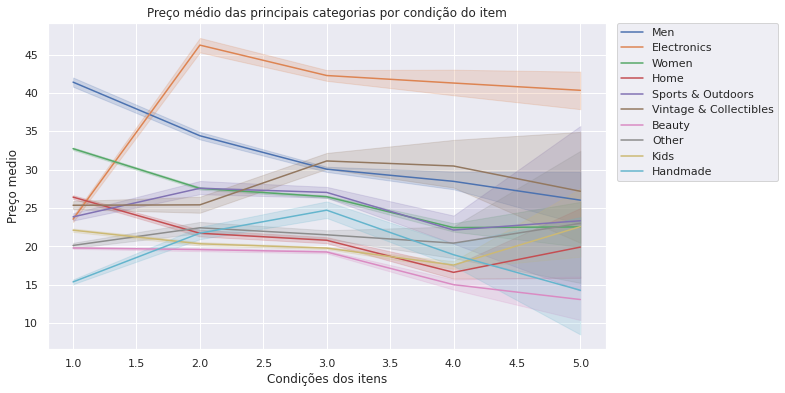

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x='item_condition_id', y='price',hue="main_cat", data=train)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel("Condições dos itens")
plt.ylabel("Preço medio")
plt.title("Preço médio das principais categorias por condição do item")
plt.show()